In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay

In [4]:
iris = load_iris()

In [2]:
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

In [5]:
# We only take the two corresponding features
X = iris.data[:, :2]
y = iris.target

# Train
clf = DecisionTreeClassifier().fit(X, y)

<ipython-input-8-336e583b429a>:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


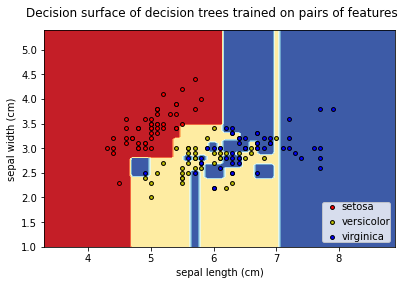

In [8]:
# Plot the decision boundary
ax = plt.subplot()
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=plt.cm.RdYlBu,
    response_method="predict",
    ax=ax,
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
)

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=color,
        label=iris.target_names[i],
        cmap=plt.cm.RdYlBu,
        edgecolor="black",
        s=15,
    )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")
plt.show()

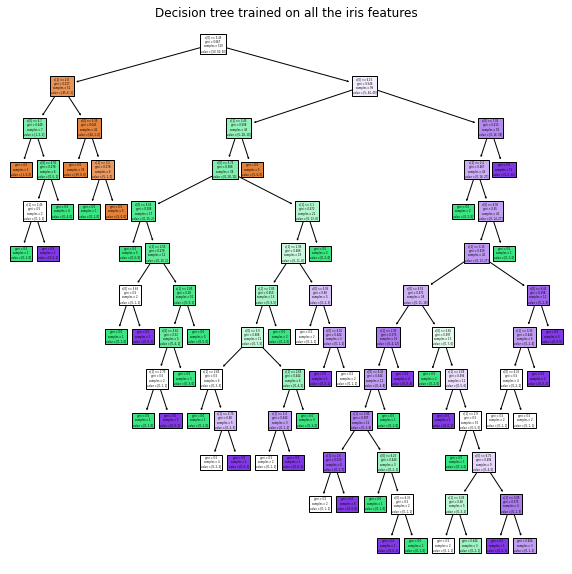

In [11]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,10))
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()